<a href="https://colab.research.google.com/github/Luizaaaa/RedesNeurais/blob/main/HW3_Luiza_Stringhini_Linhares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [ ]:
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model = tf.keras.models.Sequential()

# Input Layer


model.add(tf.keras.layers.Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(2,2), padding='same', strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a Fully Connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='softmax'))



opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        416       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 512)      

In [ ]:
history = model.fit(X_train, Y_train, batch_size=100, validation_split=0.1, epochs=8)

Epoch 1/8
450/450 [==============================] - 55s 120ms/step - loss: 2.3893 - accuracy: 0.1002 - val_loss: 2.3143 - val_accuracy: 0.0950
Epoch 2/8
450/450 [==============================] - 54s 120ms/step - loss: 2.3115 - accuracy: 0.0977 - val_loss: 2.3141 - val_accuracy: 0.0950
Epoch 3/8
450/450 [==============================] - 54s 120ms/step - loss: 2.3095 - accuracy: 0.0990 - val_loss: 2.3047 - val_accuracy: 0.0986
Epoch 4/8
450/450 [==============================] - 54s 119ms/step - loss: 2.2763 - accuracy: 0.1222 - val_loss: 2.0541 - val_accuracy: 0.2398
Epoch 5/8
450/450 [==============================] - 54s 119ms/step - loss: 1.7199 - accuracy: 0.3577 - val_loss: 1.4741 - val_accuracy: 0.4416
Epoch 6/8
450/450 [==============================] - 54s 120ms/step - loss: 1.3815 - accuracy: 0.4913 - val_loss: 1.2707 - val_accuracy: 0.5306
Epoch 7/8
450/450 [==============================] - 54s 120ms/step - loss: 1.1842 - accuracy: 0.5716 - val_loss: 1.1429 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_train, Y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=100)

100/100 [==============================] - 4s 35ms/step - loss: 1.0677 - accuracy: 0.6181


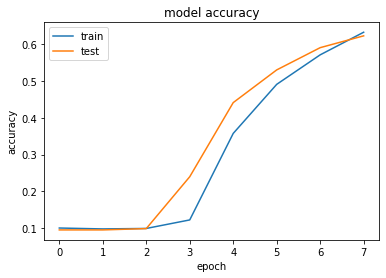

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()